### Simulate data for null t-test

Run a simulation for a t-test that is randomly sampled from one distribution with no effect between groups, and identify experiments with a significant effect.

In [1]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Set seaborn context
sns.set_style("white")
sns.set_context("talk", 
                font_scale=1)

In [3]:
# Parameters for the simulation
nsamples = 10 # number of samples per group
mu = 900
sigma = 150
niter = 1000
np.random.seed(42) # set the randomization seed for repeatability

experiments = {
    'vals': list(),
    'tstat': list(),
    'pval': list()
}

In [4]:
for n in range(niter):
    # Simulate data from a gaussian distribution
    vals = np.random.normal(loc=mu, scale=sigma, size=(nsamples,2))

    # Calculate the t-statistic and p-value
    res = sp.stats.ttest_ind(vals[:,1], vals[:,0]) # this will look at the difference x_1 - x_0
    tstat = res.statistic
    pval = res.pvalue

    experiments['vals'].append(vals)
    experiments['tstat'].append(tstat)
    experiments['pval'].append(pval)

In [5]:
# Put the experiment results in a DataFrame
all_res = pd.DataFrame({
    'tstat': experiments['tstat'],
    'pval': experiments['pval']
})

all_res.describe()

,tstat,pval
count,1000.000000,1000.000000
mean,0.010549,0.498625
std,1.033129,0.285798
min,-3.208984,0.001302
25%,-0.688717,0.255399
50%,-0.011498,0.486486
75%,0.715678,0.745063
max,3.803318,0.997249


In [6]:
all_res[all_res['pval']<0.05]

,tstat,pval
19,2.119232,0.048235
35,3.124552,0.005856
40,-2.246338,0.037470
50,-2.331183,0.031567
60,2.981271,0.008005
69,-2.131648,0.047071
82,2.232461,0.038527
133,-2.203173,0.040849
145,2.855284,0.010512
154,2.163977,0.044159


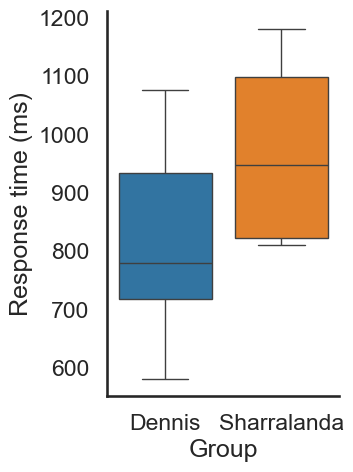

In [7]:
# Get the data for an example experiment
#exp_to_use = 75
exp_to_use = 19

exp_sample = pd.DataFrame({
    'Response time (ms)': experiments['vals'][exp_to_use].ravel(order='F'),
    'Group': np.repeat(['Dennis', 'Sharralanda'], nsamples)
})

fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(ax=ax,data=exp_sample,x='Group',y='Response time (ms)',hue='Group',legend=False)
sns.despine()
plt.xticks([0, 1], ['Dennis','Sharralanda'])
plt.show()

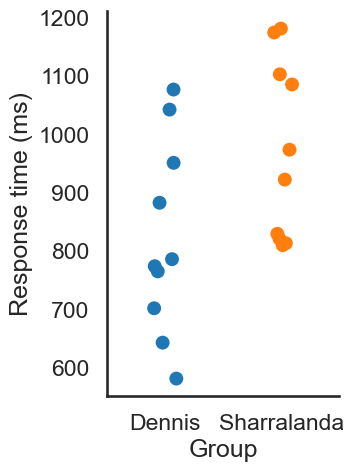

In [8]:
fig, ax = plt.subplots(figsize=(3,5))
sns.stripplot(ax=ax,data=exp_sample,x='Group',y='Response time (ms)',hue='Group',size=10,legend=False)
sns.despine()
plt.xticks([0, 1], ['Dennis','Sharralanda'])
plt.show()

In [8]:
t_meas = experiments['tstat'][exp_to_use]
effect_size = t_meas/np.sqrt(nsamples/2)
print(f"Cohen's d = {t_meas/np.sqrt(nsamples/2)}")
print(f"t-stat = {t_meas}")
print(f"P-value = {experiments['pval'][exp_to_use]}")

Cohen's d = 0.947749357038652
t-stat = 2.119231987970145
P-value = 0.04823517147047312


In [9]:
# Display the data from the experiment
experiment_data = pd.DataFrame({
    'Dennis': experiments['vals'][exp_to_use][:,0],
    'Sharralanda': experiments['vals'][exp_to_use][:,1]
})
display(experiment_data)

,Dennis,Sharralanda
0,774.041724,810.091103
1,581.415641,821.136747
2,786.130101,922.559068
3,951.263396,1181.425626
4,1042.563576,813.464452
5,765.237799,973.787876
6,701.965019,1174.718815
7,1076.916018,829.623652
8,643.029821,1103.080856
9,882.819023,1085.672447


### Plot of null distribution, Type I error

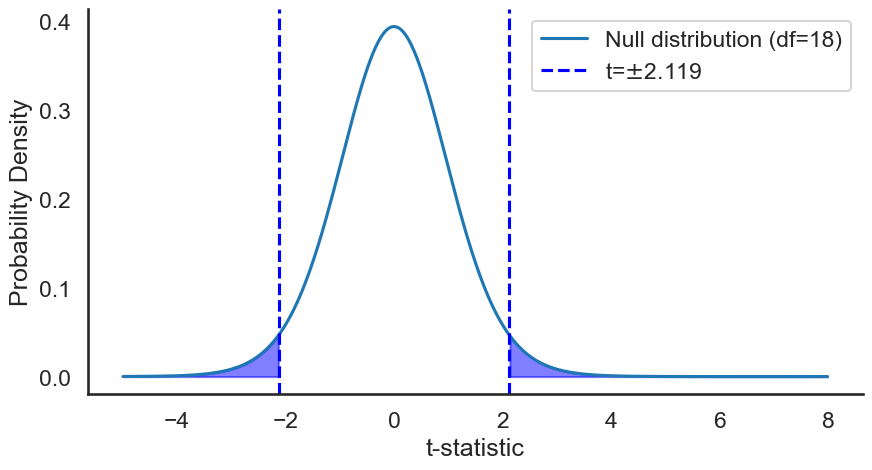

In [11]:
# Null distribution: t with n-1 df, noncentrality=0
x = np.linspace(-5, 8, 500)
null_dist = sp.stats.t(df=(nsamples-1)*2)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(nsamples-1)*2})')
# shade under the curve
#x_fill = np.hstack((x[x<-t_thres],x[x>t_thres]))
ax.fill_between(x[x<-t_meas], null_dist.pdf(x[x<-t_meas]), alpha=0.5, color='blue')
ax.fill_between(x[x>t_meas], null_dist.pdf(x[x>t_meas]), alpha=0.5, color='blue')
ax.axvline(t_meas, color='blue', linestyle='--', label=rf't=$\pm${t_meas:.3f}')
ax.axvline(-t_meas, color='blue', linestyle='--')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.legend(loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

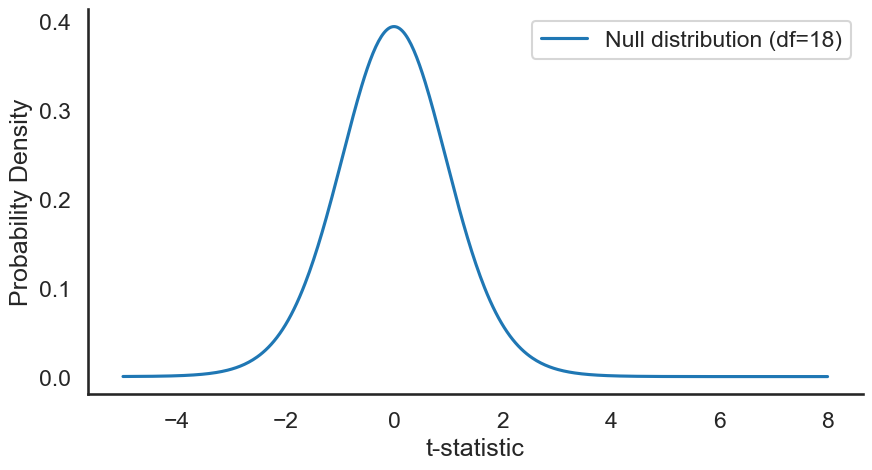

In [27]:
# Sample plot, but without Type I error labeled
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(nsamples-1)*2})')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.legend(loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Calculate statistical power of the test

In [13]:
alpha = 0.05
t_thres = sp.stats.t.isf(alpha/2,df=(nsamples-1)*2) # assumes two-tailed
print(f'Threshold t-value for p = 0.05: {t_thres}')

beta = sp.stats.nct.cdf(t_thres,df=(nsamples-1)*2,nc=t_meas)
power = 1-beta
print(f'Statistical power = {power}')

Threshold t-value for p = 0.05: 2.10092204024096
Statistical power = 0.5182127327536016


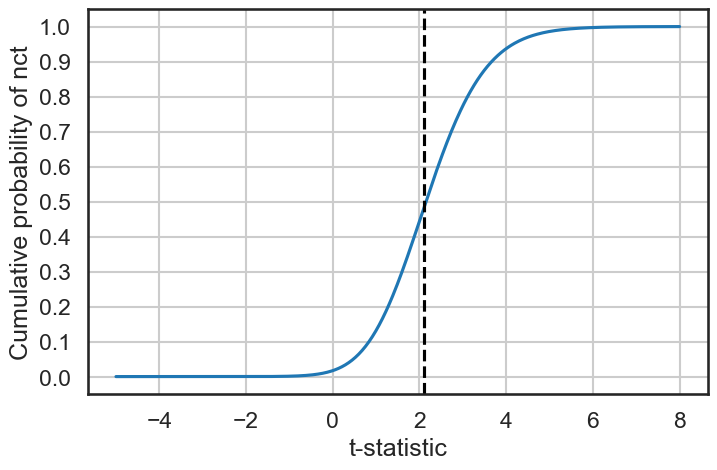

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, sp.stats.nct.cdf(x, df=(nsamples-1)*2,nc=t_meas))
ax.axvline(t_thres, color='black', linestyle='--', label=f't where p<0.05 (t={t_thres:.3f})')
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xlabel('t-statistic')
ax.set_ylabel('Cumulative probability of nct')
ax.grid(True)


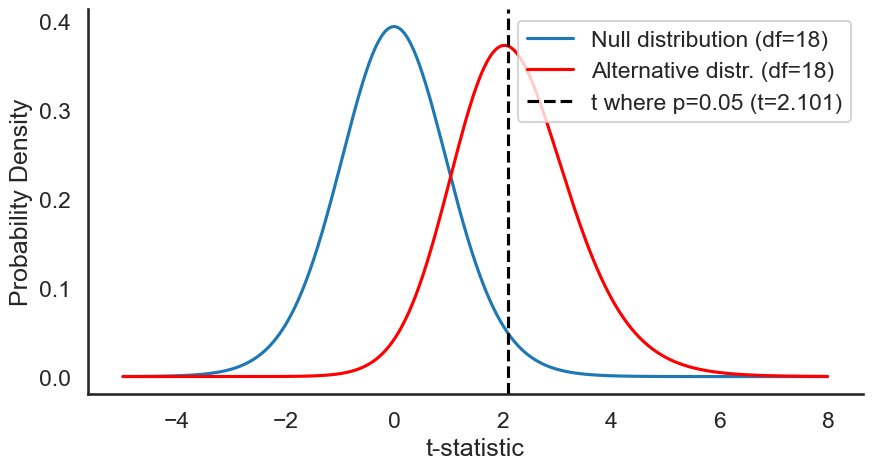

In [14]:
# Null distribution: t with n-1 df, noncentrality
x = np.linspace(-5, 8, 500)
null_dist = sp.stats.t(df=(nsamples-1)*2)
alt_dist = sp.stats.nct(df=(nsamples-1)*2, nc=t_meas)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(nsamples-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(nsamples-1)*2})')
ax.axvline(t_thres, color='black', linestyle='--', label=f't where p=0.05 (t={t_thres:.3f})')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')
plt.show()

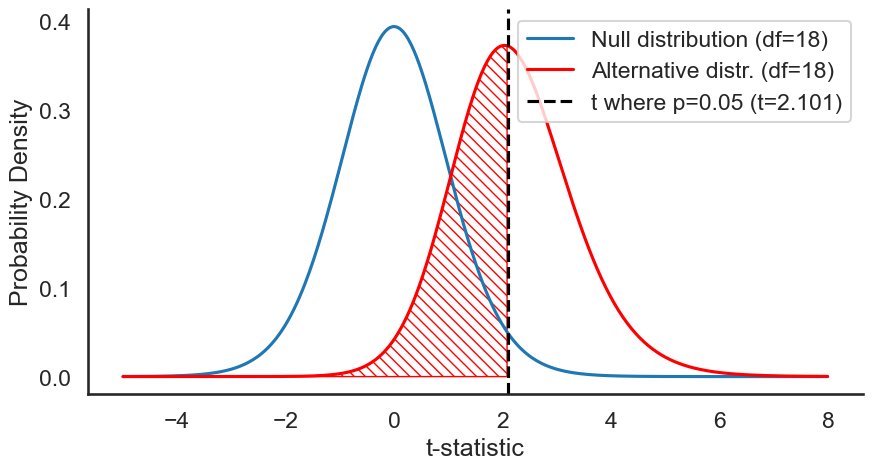

In [15]:
# Same plot, but now fill in the Type II error
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(nsamples-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(nsamples-1)*2})')
ax.fill_between(x[x<t_thres], alt_dist.pdf(x[x<t_thres]), facecolor='none', edgecolor='red',
    hatch='\\\\\\', linewidth=1)
ax.axvline(t_thres, color='black', linestyle='--', label=f't where p=0.05 (t={t_thres:.3f})')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')
plt.show()

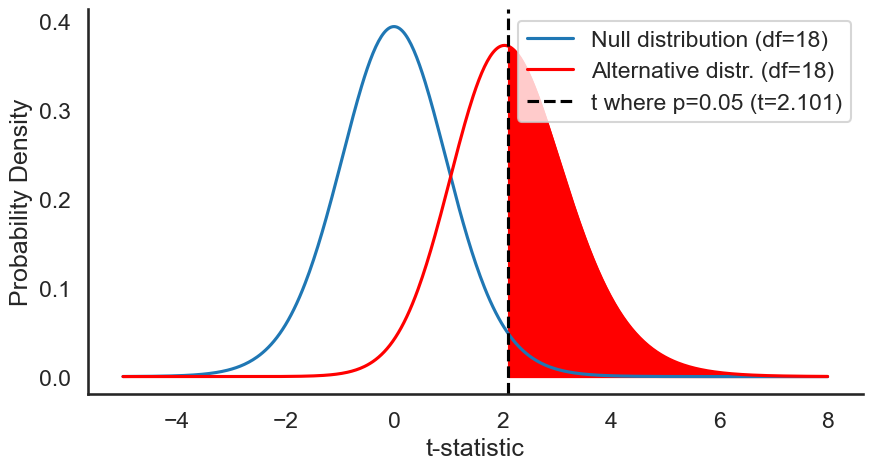

In [17]:
# Same plot, but now fill in the statistical power
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(nsamples-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(nsamples-1)*2})')
ax.fill_between(x[x>t_thres], alt_dist.pdf(x[x>t_thres]), color='red')
ax.axvline(t_thres, color='black', linestyle='--', label=f't where p=0.05 (t={t_thres:.3f})')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')
plt.show()

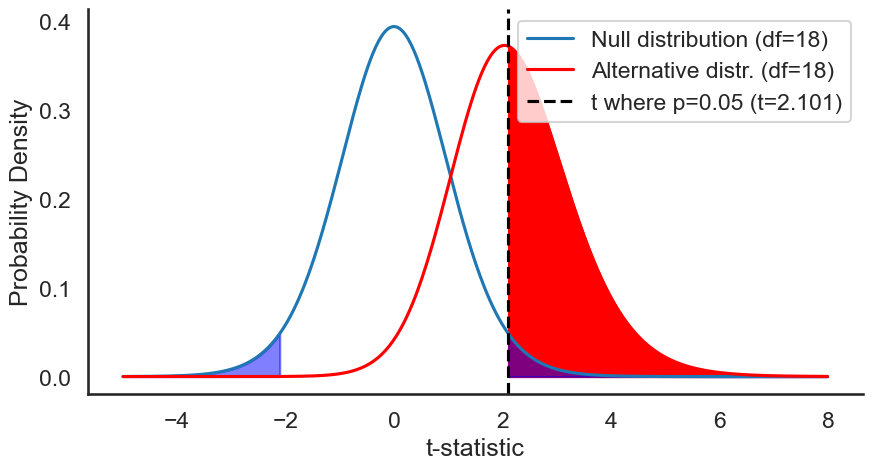

In [18]:
# Same plot, but now fill in the statistical power
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(nsamples-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(nsamples-1)*2})')
ax.fill_between(x[x>t_thres], alt_dist.pdf(x[x>t_thres]), color='red')
ax.fill_between(x[x<-t_thres], null_dist.pdf(x[x<-t_thres]), alpha=0.5, color='blue')
ax.fill_between(x[x>t_thres], null_dist.pdf(x[x>t_thres]), alpha=0.5, color='blue')
ax.axvline(t_thres, color='black', linestyle='--', label=f't where p=0.05 (t={t_thres:.3f})')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')
plt.show()